# SMS SPAM and HAM dectection 

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("spam.csv")
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.dtypes
#All colums are objects

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

## DATA cleaning


In [5]:
print(df.info())
print(df.isnull().sum())#for checking the data and getting info realted to different colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


### Droping Last three colums (allmost all values are NAN)

In [6]:

df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

### Renaming the colums

In [7]:

df.rename(columns={"v1":"class","v2":"sms_text"},inplace=True)
df

,class,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Encoding the class into numberic values

In [8]:
from sklearn.preprocessing import LabelEncoder  #to change class value into num
sms_encdor=LabelEncoder()


In [9]:
df["class"]=sms_encdor.fit_transform(df["class"])

### Checking any duplicates

In [10]:
df.duplicated().sum() 

403

In [11]:
#403 duplicates removed or droped from main data set

df=df.drop_duplicates(keep="first")
df.duplicated().sum() # now no duplicates values
df

,class,sms_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA 

In [12]:
df.head() #Data is ready for analyis 

,class,sms_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Data  distribution

In [13]:

df['class'].value_counts() #data set is having approx 12.6 percent spam sms
#data is imbalnace

0    4516
1     653
Name: class, dtype: int64

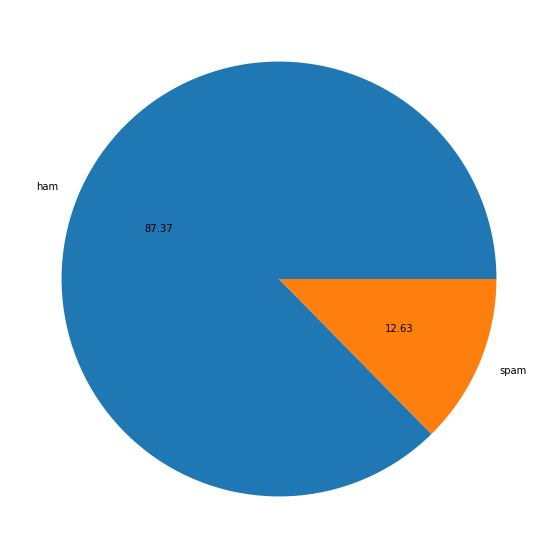

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.pie(df['class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Refining and breaking the SMS text for futhur analysis by usning Natural Lang. Toolkit 

In [15]:
import nltk  #

In [16]:
#nltk.download('punkt')

In [17]:
df['Number_char']=df['sms_text'].apply(len)  #numebr of char in sms text
df['Number_words']=df['sms_text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words in a sms 
df['Number_sentences']=df['sms_text'].apply(lambda x:len(nltk.sent_tokenize(x))) # number of sentences in a sms

<ipython-input-17-f07a9ddddce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_char']=df['sms_text'].apply(len)  #numebr of char in sms text
<ipython-input-17-f07a9ddddce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_words']=df['sms_text'].apply(lambda x:len(nltk.word_tokenize(x))) #number of words in a sms
<ipython-input-17-f07a9ddddce2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

## Describing the Ham Sms

In [18]:
df[df['class']==0][['Number_char','Number_words','Number_sentences']].describe()  #discrption of ham sms

,Number_char,Number_words,Number_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Describing the Spam Sms

In [19]:
df[df['class']==1][['Number_char','Number_words','Number_sentences']].describe()   #discrption of spam sms

,Number_char,Number_words,Number_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


## Number_char

AttributeError: 'PolyCollection' object has no property 'kind'

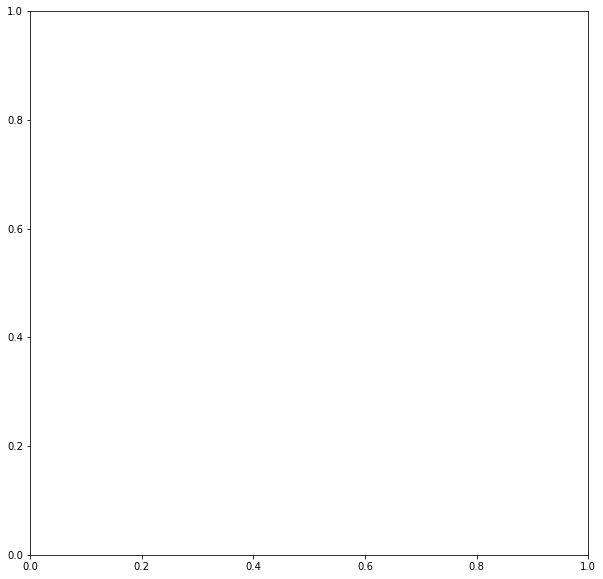

In [20]:
#plotting histogram
import seaborn as sns

plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]['Number_char'],color="green",kind="kde")
sns.histplot(df[df['class']==1]['Number_char'],color='red',kind='kde')

#this show a trend that number of char are bit higher side  for span sms as compared to ham sms 

In [ ]:

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]['Number_char'],color="green",kind='ecdf')
plt.title("Ham sms")
plt.grid()
sns.displot(df[df['class']==1]['Number_char'],color='red',kind="ecdf")
plt.title("Spam sms")
plt.grid()

## Number_words

In [ ]:

plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]["Number_words"],color="green")
plt.title("Ham sms")
sns.histplot(df[df['class']==1]["Number_words"],color='red')
plt.title("Spam sms")
#this show a trend that number of word are bi higher side for span sms as compared to ham sms 

In [ ]:
#cumlative plots

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]["Number_words"],color="green",kind='ecdf')
plt.grid()
sns.displot(df[df['class']==1]["Number_words"],color='red',kind='ecdf')
plt.grid()

# Number_sentences

<AxesSubplot:xlabel='Number_sentences', ylabel='Count'>

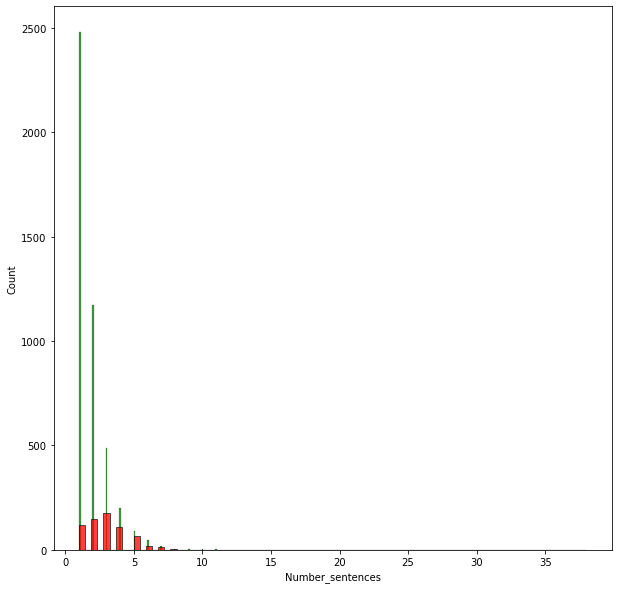

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['class']==0]["Number_sentences"],color="green")

sns.histplot(df[df['class']==1]["Number_sentences"],color='red')

#this show a trend that number of sentences are bi higher side for span sms as compared to ham sms 

<Figure size 720x720 with 0 Axes>

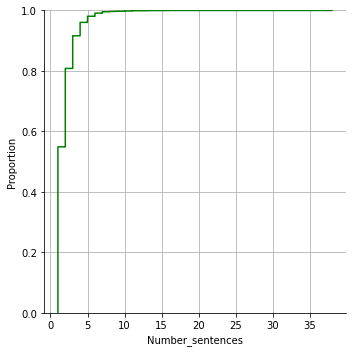

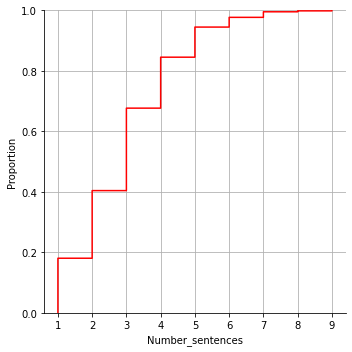

In [22]:

plt.figure(figsize=(10,10))
sns.displot(df[df['class']==0]["Number_sentences"],color="green",kind="ecdf")
plt.grid()
sns.displot(df[df['class']==1]["Number_sentences"],color='red',kind="ecdf")
plt.grid()

## Kernel Density Estimate Plot

### Number_char and Number_words kde contour

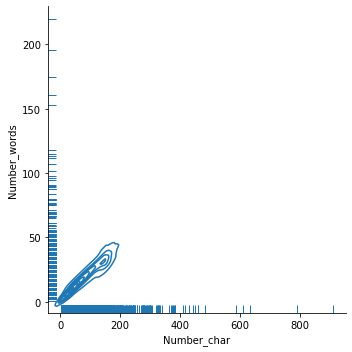

In [23]:
sns.displot(x="Number_char",y="Number_words",data=df,kind="kde",rug=True)

### Number_char vs Number_sentences kde contour

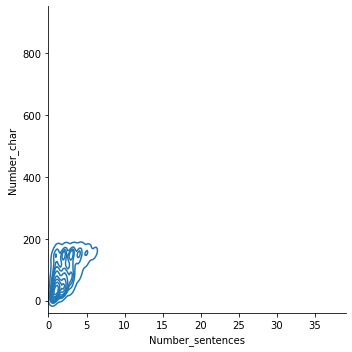

In [24]:
sns.displot(y="Number_char",x="Number_sentences",data=df,kind='kde')

### Number_words vs Number_sentences kde contour

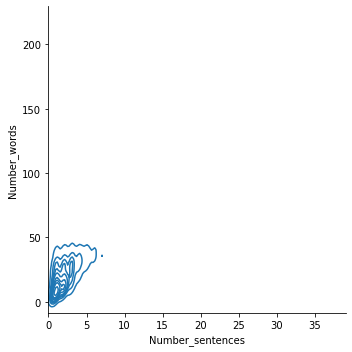

In [25]:
sns.displot(y="Number_words",x="Number_sentences",data=df,kind='kde')

## Pair plot 

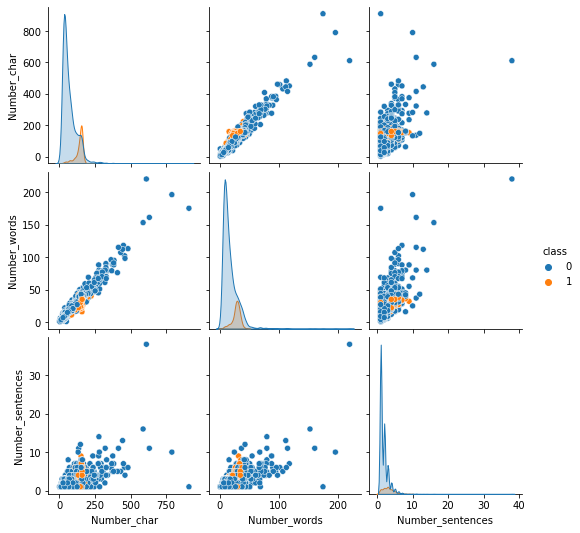

In [26]:
sns.pairplot(df,hue='class')

#The pair plots shows realtions btween the two col of data


# corealtion matrix

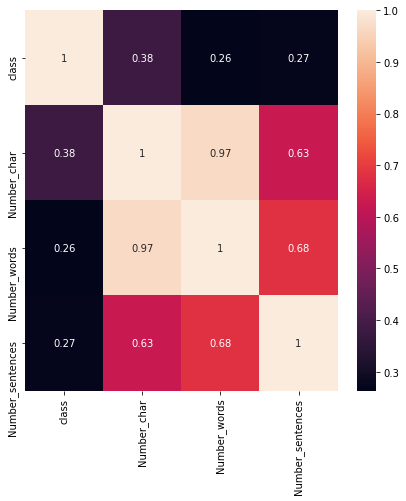

In [27]:
#corealtion Pearson
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
#conclution from heatmap
#1 higest coeff. is 0.97 btw number of char and number of words . Data has multicolinaerity
#2 we will keep Number_char col for analyis because it has 0.38 corr for the class  

## Data Preprocessing
### Lower case
### Tokenization
### Removing special char
### removing stop words and punctuation
### Stemming


In [28]:
#importing lib for data preprocessing
from nltk.corpus import stopwords #for words in english that help in making sentences
import string  #for punctuations 
from nltk.stem.porter import PorterStemmer #for stemming


In [29]:
#function
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text) #text is converted into list
    mylist=[]
    for ele in text:
        if ele.isalnum():
            mylist.append(ele)
            
    #print(mylist)   
    text=mylist[:]
    mylist.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            mylist.append(i)
            
    ps=PorterStemmer()
    
    text=mylist[:]
    mylist.clear()
    
    for j in text:
        mylist.append(ps.stem(j))
        #for stemming of words
    
            
    return " ".join(mylist)
            


In [30]:
#testing my function 
text_transform("<<<<<<<<<<<<<<< My name is Suraj Saini and my roll number is ME20S031. I like reading books of Machine Learning>>>>>>>>>>>>>>> ")

'name suraj saini roll number me20s031 like read book machin learn'

In [31]:
#Making a new col after data preprocessing
df["text_transform"]=df["sms_text"].apply(text_transform)

<ipython-input-31-f8a16d6a89e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_transform"]=df["sms_text"].apply(text_transform)


# Word cloud

In [32]:
###wordcloud 
from wordcloud import WordCloud
wc=WordCloud(width=600,height=600,min_font_size=12,background_color="white")
spam_sms_wc=wc.generate(df[df['class']==1]['text_transform'].str.cat(sep=" "))


### SPAM words

Text(0.5, 1.0, 'SPAM SMS Common words')

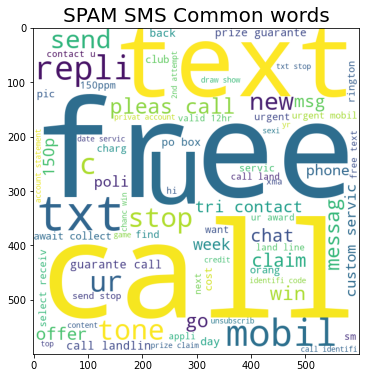

In [33]:
df[df['class']==1]['text_transform']

plt.figure(figsize=(15,6))
plt.imshow(spam_sms_wc)
plt.title("SPAM SMS Common words",fontsize=20)

### HAM words

Text(0.5, 1.0, 'HAM SMS Common words')

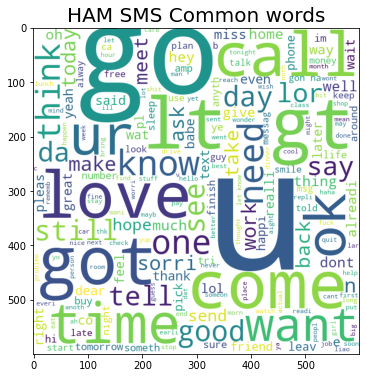

In [34]:
ham_sms_wc=wc.generate(df[df['class']==0]['text_transform'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_sms_wc)
plt.title("HAM SMS Common words",fontsize=20)

### Some top words used in ham and spam sms 

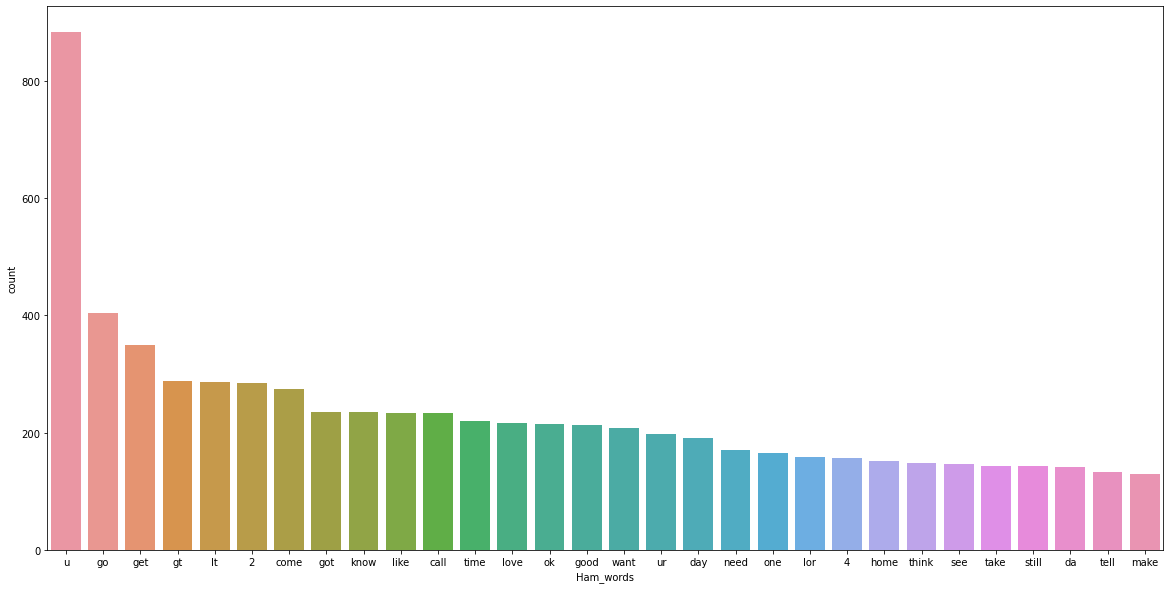

In [35]:
common_ham_ward=list(df[df["class"]==0]["text_transform"])
map_={}
for ele in common_ham_ward:
    for i in ele.split():
        if i not in map_:
            map_[i]=1
        else:
            map_[i]+=1
        
    
ham_df=pd.DataFrame(sorted(map_.items(),key=lambda x:x[1],reverse=True))
ham_df.columns={"Ham_words","count"}

#Plotting
plt.figure(figsize=(20,10))
sns.barplot(ham_df["Ham_words"][:30],ham_df["count"][:30])
#plt.xticks(rotation='vertical',fontsize=15)
plt.show()

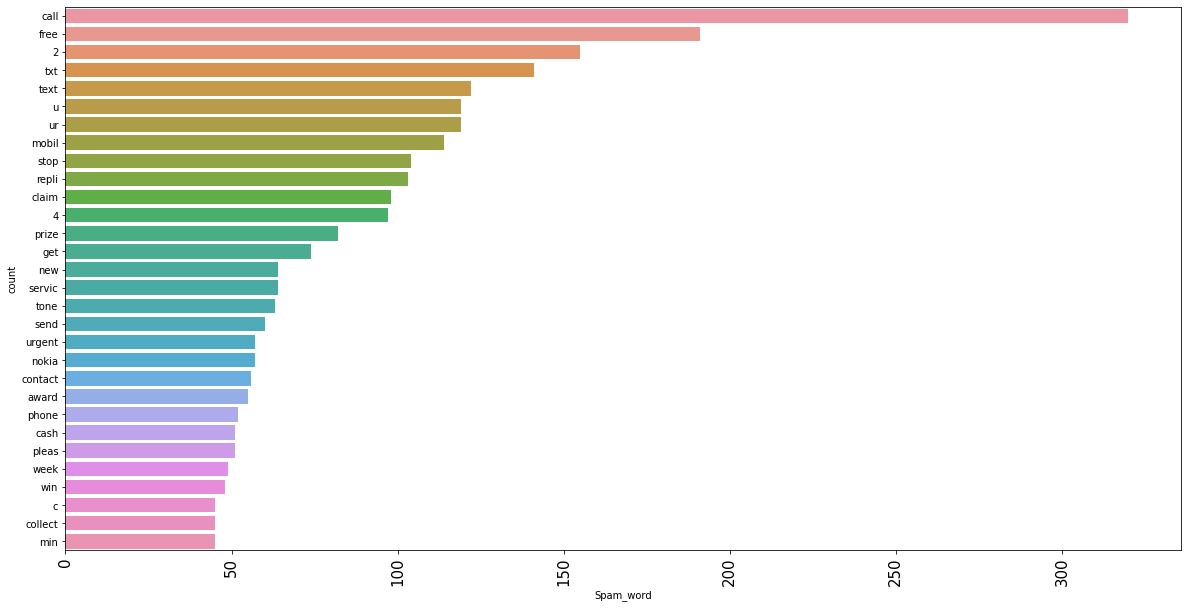

In [36]:

common_spam_word=list(df[df["class"]==1]["text_transform"])
map__={}
for ele in common_spam_word:
    for i in ele.split():
        if i not in map__:
            map__[i]=1
        else:
            map__[i]+=1
            
            
spam_df=pd.DataFrame(pd.DataFrame(sorted(map__.items(),key=lambda x:x[1],reverse=True)))
spam_df.columns={"count","Spam_word"}



#Plotting
plt.figure(figsize=(20,10))
sns.barplot(spam_df["Spam_word"][:30],spam_df["count"][:30])
plt.xticks(rotation='vertical',fontsize=15)
plt.show()


In [37]:

k=set(ham_df["Ham_words"])
j=set(spam_df["Spam_word"])     

In [38]:
comm_words=list(k.intersection(j))
d=pd.DataFrame(comm_words)
df

,class,sms_text,Number_char,Number_words,Number_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Conclustions


### 1.Duplicate sms are present in data.

## FROM pie chart

### 2. Ham msg are more than spam msg(only 12.6 percent spam sms)

## From Histogram and CDF plot 

### 3. Mean of words , char and sentences in ham sms are lower than in spam msg in all cases.

### 4. This Ham sms CDF plot shows that in Ham sms approx 0.98 charters are less than 200 and Spam sms CDF plot shows that approx 0.98 charters are less than 180.

### 5. Ham sms CDF plot shows that in Ham sms approx 0.98 words are less than 50 and Spam sms CDF plot shows that approx 0.98 charters are less than 40.

### 6 This Ham sms CDF plot shows that in Ham sms approx 0.98 sentences are less than 5 and Spam sms CDF plot shows that approx 0.98 charters are less than 7.

## From pair plot 

### 7 Number of char and number of word have direct linear relation 

### 8 Sentences shows some linear trend but difficult to comment anything. 

## conclution from heatmap

### 9 Higest coeff. is 0.97 btw number of char and number of words . Data has multicolinaerity

### 10 Number of char showed strongest corealtion  of 0.38 with the class  colum.

## word cloud

### 11   "go" and "u" words are most frequent word used in ham sms . "Free" and "call" words are most frequent used in spam sms

### 12    876 words are common in spam and ham sms word cloud so while developing model we have to keep them in mind

# Model Building 

In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()  #converting text into vector

tfidf=TfidfVectorizer(max_features=4700)

In [40]:
#X=cv.fit_transform(df['text_transform']).toarray()

X=tfidf.fit_transform(df['text_transform']).toarray()


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)

In [42]:

# Appending the num_character col to X
X2 = np.hstack((X,df['Number_char'].values.reshape(-1,1)))


X3=scaler.fit_transform(X2)

In [43]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
y=df['class'].values


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.2,random_state=2) 
x_train2,x_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.2,random_state=2) 
x_train3,x_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.2,random_state=2)

#Use a new random number generator seeded by the given integer. 
#Using an int will produce the same results across different calls

In [47]:
test_list=[[x_train,x_test,y_train,y_test],[x_train1,x_test1,y_train1,y_test1],[x_train2,x_test2,y_train2,y_test2]]

In [48]:
#test_list

In [49]:


gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

## GaussianNB

In [50]:


gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("Accuracy score of gnb :",accuracy_score(y_test,y_pred1))
print("Confusion matrix of gnb :",confusion_matrix(y_test,y_pred1))
print("Precision Score of gnb :",precision_score(y_test,y_pred1))













Accuracy score of gnb : 0.874274661508704
Confusion matrix of gnb : [[791 105]
 [ 25 113]]
Precision Score of gnb : 0.518348623853211


## MultinomialNB

In [51]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)

print("Accuracy score of mnb :",accuracy_score(y_test,y_pred2))
print("Confusion matrix of mnb :",confusion_matrix(y_test,y_pred2))
print("Precision Score of mnb :",precision_score(y_test,y_pred2))


Accuracy score of mnb : 0.965183752417795
Confusion matrix of mnb : [[896   0]
 [ 36 102]]
Precision Score of mnb : 1.0


## BernoulliNB : best results max feature 4700

### Data set without scalling

In [52]:


bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)

print("Accuracy score of bnb :",accuracy_score(y_test,y_pred3))
print("Confusion matrix of bnb :",confusion_matrix(y_test,y_pred3))
print("Precision Score of nb :",precision_score(y_test,y_pred3))


Accuracy score of bnb : 0.9806576402321083
Confusion matrix of bnb : [[896   0]
 [ 20 118]]
Precision Score of nb : 1.0


### Data set with scaling

In [53]:

bnb.fit(x_train1,y_train1)
y_pred3=bnb.predict(x_test1)

print("Accuracy score of bnb :",accuracy_score(y_test1,y_pred3))
print("Confusion matrix of bnb :",confusion_matrix(y_test1,y_pred3))
print("Precision Score of nb :",precision_score(y_test1,y_pred3))


Accuracy score of bnb : 0.9806576402321083
Confusion matrix of bnb : [[896   0]
 [ 20 118]]
Precision Score of nb : 1.0


### Data set by adding extra char col number in data set

In [54]:

bnb.fit(x_train2,y_train2)
y_pred3=bnb.predict(x_test2)

print("Accuracy score of bnb :",accuracy_score(y_test2,y_pred3))
print("Confusion matrix of bnb :",confusion_matrix(y_test2,y_pred3))
print("Precision Score of nb :",precision_score(y_test2,y_pred3))


Accuracy score of bnb : 0.9806576402321083
Confusion matrix of bnb : [[896   0]
 [ 20 118]]
Precision Score of nb : 1.0


### best performance with acc- 0.9806 and precision 1 by using Tfidk - MNB

In [55]:
dic1={"Algorithm":"bnb","Accuracy":accuracy_score(y_test,y_pred3),"Precision":precision_score(y_test,y_pred3)}


In [56]:
################################################################

# Testing other models

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0) 
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [59]:


clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}



In [60]:


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision



In [61]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.9745762711864406)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision,"\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406 

For  KN
Accuracy -  0.9032882011605415
Precision -  1.0 

For  NB
Accuracy -  0.965183752417795
Precision -  1.0 

For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461 

For  LR
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347 

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829 

For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655 

For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693 

For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865 

For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.8990825688073395 



C:\Users\Varun kumar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:59:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722 



In [63]:


performance_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.974855,0.974576
1,KN,0.903288,1.000000
2,NB,0.965184,1.000000
3,DT,0.936170,0.846154
4,LR,0.951644,0.948980
5,RF,0.975822,0.982906
6,AdaBoost,0.967118,0.948276
7,BgC,0.959381,0.869231
8,ETC,0.975822,0.974790
9,GBDT,0.950677,0.899083


In [64]:
performance_df=performance_df.append(dic,ignore_index=True).sort_values('Precision',ascending=False)


NameError: name 'dic' is not defined

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=6,saturation=0.9,aspect=1.5)

plt.ylim(0.8,1.0)
plt.xticks(rotation='vertical',fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Value",fontsize=20)

plt.show()

# Model improve

In [ ]:
performance_df.append()

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [ ]:


voting.fit(x_train,y_train)



In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))